# WeatherPy
----

## Observable Trends
1) Latitude and temperture have a strong correlation.  As you move away from the equator the temperture varies depending on the season that the hemisphere is in.
2) Wind speed is not dependent on Latitude.  The regression line shows that.
3) In both hemispheres as you move away from the equator the humidity increases.  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# Setup for api calls
url = 'http://api.openweathermap.org/data/2.5/weather?'
#query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'

In [5]:
# for city in cities:
# c_data = requests.get(query_url).json()
# pprint(c_data)
city_data = []
# counter = 0
for city in cities:
    # counter = counter + 1
    # if counter % 60 == 0:
    #     time.sleep(60)
    #     print('Taking a power nap')

    query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
    c_data = requests.get(query_url).json()
    try:
        print(f"City {c_data['name']}  Temperture:  {c_data['main']['temp']}F Humidity: {c_data['main']['humidity']}%" +
        f" Clouds: {c_data['clouds']['all']}% Wind {c_data['wind']['speed']}mph county {c_data['sys']['country']}  date {c_data['dt']}")
        city_data.append({'City': c_data['name'],
                        'Lat': c_data['coord']['lat'],
                        'Lon': c_data['coord']['lon'],
                        'Temp': c_data['main']['temp_max'],
                        'Humidity': c_data['main']['humidity'],
                        'Cloudiness': c_data['clouds']['all'],
                        'Wind Speed': c_data['wind']['speed'],
                        'Country': c_data['sys']['country'],
                        'Date': c_data['dt']})
    except:
        print(f"Something croke {city}")


City Arraial do Cabo  Temperture:  82.26F Humidity: 74% Clouds: 40% Wind 13.8mph county BR  date 1645556611
City Pudozh  Temperture:  22.75F Humidity: 96% Clouds: 92% Wind 4.7mph county RU  date 1645556612
City Torbay  Temperture:  29.52F Humidity: 45% Clouds: 100% Wind 4mph county CA  date 1645556612
City Road Town  Temperture:  82.44F Humidity: 69% Clouds: 40% Wind 8.05mph county VG  date 1645556419
City Avarua  Temperture:  80.65F Humidity: 83% Clouds: 40% Wind 10.36mph county CK  date 1645556612
City Saskylakh  Temperture:  -1.1F Humidity: 95% Clouds: 100% Wind 5.7mph county RU  date 1645556613
City Garissa  Temperture:  89.89F Humidity: 33% Clouds: 100% Wind 12.12mph county KE  date 1645556613
City Eureka  Temperture:  43.48F Humidity: 91% Clouds: 98% Wind 4mph county US  date 1645556472
City Avera  Temperture:  76.91F Humidity: 53% Clouds: 5% Wind 12.68mph county US  date 1645556614
City São Filipe  Temperture:  69.19F Humidity: 77% Clouds: 16% Wind 8.52mph county CV  date 164555

In [6]:
#pprint(city_data)
city_df = pd.DataFrame(city_data)
#pd.set_option('display.max_rows', 150)
city_df.to_csv(index=False)
city_df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,82.26,74,40,13.80,BR,1645556611
1,Pudozh,61.8099,36.5345,22.75,96,92,4.70,RU,1645556612
2,Torbay,47.6666,-52.7314,30.88,45,100,4.00,CA,1645556612
3,Road Town,18.4167,-64.6167,82.44,69,40,8.05,VG,1645556419
4,Avarua,-21.2078,-159.7750,80.65,83,40,10.36,CK,1645556612
...,...,...,...,...,...,...,...,...,...
559,Hurricane,37.1753,-113.2899,45.70,68,100,17.45,US,1645556537
560,Sabzawār,36.2126,57.6819,47.97,61,95,6.51,IR,1645556795
561,Tamandaré,-8.7597,-35.1047,83.84,57,0,9.35,BR,1645556796
562,Belmonte,-15.8631,-38.8828,82.90,67,6,8.01,BR,1645556796


In [7]:
# print(f"City {c_data['name']}  Temperture:  {c_data['main']['temp']}F Humidity: {c_data['main']['humidity']}%" +
#         f" Clouds: {c_data['clouds']['all']}% Wind {c_data['wind']['speed']}mph")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.to_csv("Output/city_data.csv", index=False, header=True)
city_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,82.26,74,40,13.80,BR,1645556611
1,Pudozh,61.8099,36.5345,22.75,96,92,4.70,RU,1645556612
2,Torbay,47.6666,-52.7314,30.88,45,100,4.00,CA,1645556612
3,Road Town,18.4167,-64.6167,82.44,69,40,8.05,VG,1645556419
4,Avarua,-21.2078,-159.7750,80.65,83,40,10.36,CK,1645556612


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

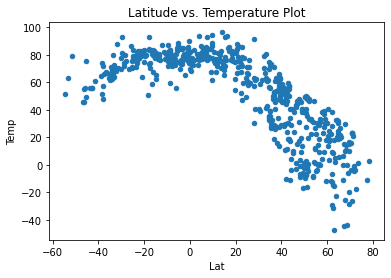

In [11]:
ax1 = city_df.plot.scatter(x='Lat', y='Temp')
ax1.title.set_text('Latitude vs. Temperature Plot')

## Latitude vs. Humidity Plot

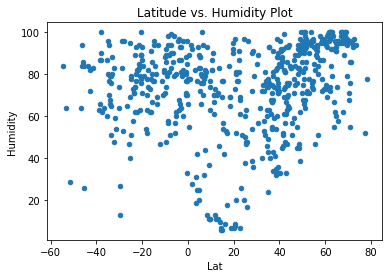

In [16]:
ax1 = city_df.plot.scatter(x='Lat', y='Humidity')
ax1.title.set_text('Latitude vs. Humidity Plot')

## Latitude vs. Cloudiness Plot

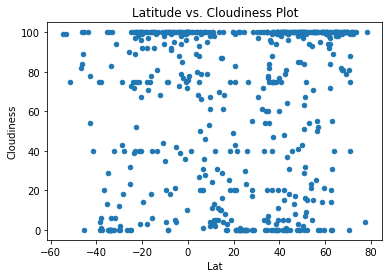

In [15]:
ax1 = city_df.plot.scatter(x='Lat', y='Cloudiness')
ax1.title.set_text('Latitude vs. Cloudiness Plot')

## Latitude vs. Wind Speed Plot

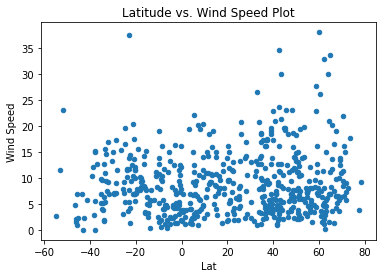

In [14]:
ax1 = city_df.plot.scatter(x='Lat', y='Wind Speed')
ax1.title.set_text('Latitude vs. Wind Speed Plot')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

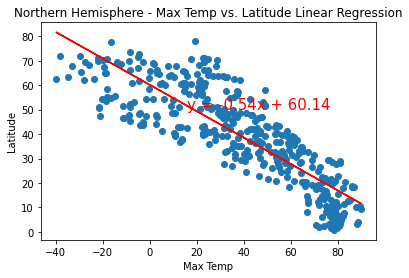

In [ ]:
n_lat_df = city_df.loc[city_df['Lat'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,50),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
s_lat_df = city_df.loc[city_df['Lat'] < 0]
# s_lat_df
y_values = s_lat_df['Lat']
x_values = s_lat_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-50),fontsize=15,color="red")
plt.show()

NameError: name 'city_df' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

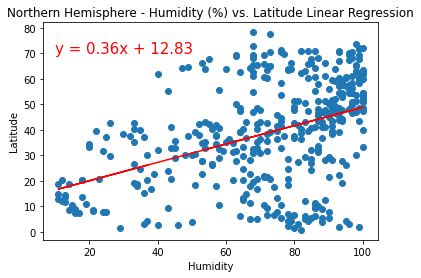

In [ ]:
n_lath_df = city_df.loc[city_df['Humidity'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

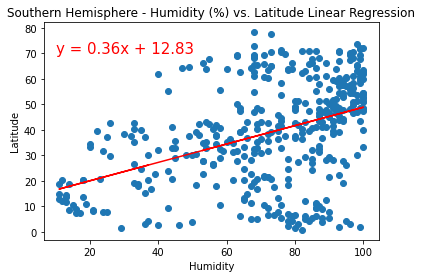

In [ ]:
s_lath_df = city_df.loc[city_df['Humidity'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

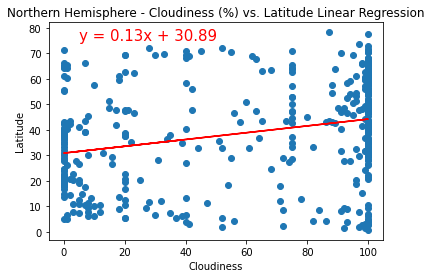

In [ ]:
n_latc_df = city_df.loc[city_df['Cloudiness'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

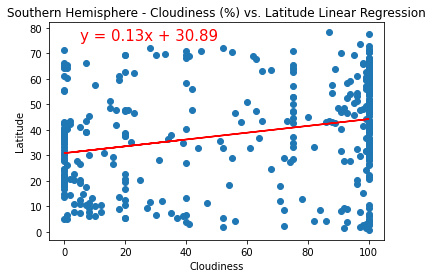

In [ ]:
s_latc_df = city_df.loc[city_df['Cloudiness'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

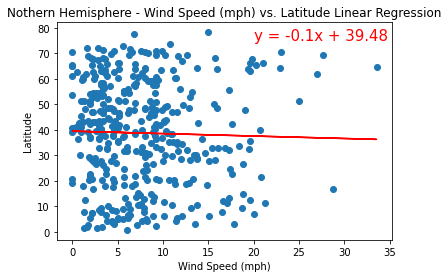

In [ ]:
n_lats_df = city_df.loc[city_df['Wind Speed'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Nothern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

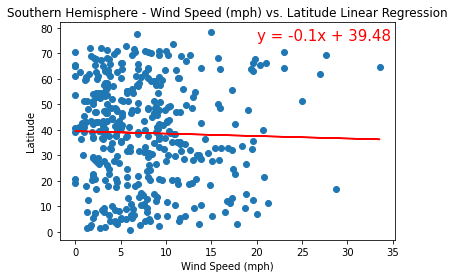

In [ ]:
s_lats_df = city_df.loc[city_df['Wind Speed'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.show()